In [96]:
#Importar librerías necesarías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# leer el archivo csv en un DataFrame
df=pd.read_csv("Meta_FNCER__Incorporar_en_la_matriz_energ_tica_nueva_capacidad_instalada_a_partir_de_Fuentes_No_Convencionales_de_Energ_a_Renovable_-_FNCER_20250813.csv")
#contar cantidad de registros
df.count()


Proyecto                    158
Tipo                        158
Capacidad                   158
Departamento                158
Municipio                   158
Código Departamento         158
Código Municipio            158
Fecha estimada FPO          158
Energía [kWh/día]           158
Usuarios                    158
Inversión estimada [COP]    158
Empleos estimados           158
Emisiones CO2 [Ton/año]     158
dtype: int64

In [98]:
# Mostrar las primeras filas del DataFrame
print("===============Vista inicial del DataFrame===================")
display(df.head(10))
display(df.describe())

===============Vista inicial del DataFrame===================


,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
5,AGPE TECNOEMPAQUES DE OCCIDENTE,Solar,0.10,VALLE DEL CAUCA,CALI,76,76001,2019-12-19T00:00:00.000,480,83,430000000,1,140
6,RADAR FAC SAN ANDRÉS,Solar,0.01,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",SAN ANDRÉS,88,88001,2019-12-30T00:00:00.000,48,8,43000000,0,14
7,AGPE SFV MCDONALDS SOLEDAD,Solar,0.09,ATLÁNTICO,SOLEDAD,8,8758,2020-02-27T00:00:00.000,432,75,387000000,1,126
8,CELSIA SOLAR ESPINAL,Solar,9.90,TOLIMA,ESPINAL,73,73268,2020-05-31T00:00:00.000,47520,8240,42570000000,69,13876
9,FEDERACIÓN NACIONAL DE CAFETEROS,Solar,0.08,TOLIMA,IBAGUÉ,73,73001,2020-09-02T00:00:00.000,384,67,344000000,1,112


,Capacidad,Código Departamento,Código Municipio,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año]
count,158.000000,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.000000
mean,37.971646,42.829114,41551.797468,2.312960e+05,40109.063291,1.450582e+11,221.607595,67538.462025
std,78.068671,26.605922,27283.549553,5.070385e+05,87925.819429,2.938303e+11,485.174312,148055.230112
min,0.010000,5.000000,23.000000,2.100000e+01,4.000000,9.800000e+06,0.000000,6.000000
25%,2.275000,17.500000,13675.500000,1.092000e+04,1893.750000,9.513750e+09,16.000000,3189.000000
50%,9.900000,44.000000,44847.000000,4.752000e+04,8240.000000,3.963250e+10,69.000000,13876.000000
75%,20.750000,70.000000,68514.750000,1.123800e+05,19487.750000,8.557000e+10,144.250000,32814.750000
max,700.000000,94.000000,94001.000000,3.360000e+06,582659.000000,2.625000e+12,4872.000000,981120.000000


In [112]:
# Renombrar columnas para facilidad
df = df.rename(columns={
    'Inversión estimada [COP]': 'Inversion_COP',
    'Emisiones CO2 [Ton/año]': 'CO2_ton_anio',
    'Capacidad': 'Capacidad_MW',
    'Fecha estimada FPO': 'Fecha_FPO'
})

# Info general
print("Dimensiones:", df.shape)
print("Número de elementos:", df.size)
print("Nombres de columnas:", df.columns.tolist())
print("Tipos de datos:", df.dtypes)

# Valores nulos
print("\nNulos por columna:\n", df.isnull().sum())

# Tratamiento de nulos: reemplazar numéricos con la media, texto con la moda
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# verificar valores nulos
print("\n Valores nulos por columnas:")
df.isnull().sum()

Dimensiones: (158, 16)
Número de elementos: 2528
Nombres de columnas: ['Proyecto', 'Tipo', 'Capacidad_MW', 'Departamento', 'Municipio', 'Código Departamento', 'Código Municipio', 'Fecha_FPO', 'Energía [kWh/día]', 'Usuarios', 'Inversion_COP', 'Empleos estimados', 'CO2_ton_anio', 'Año FPO', 'Año_FPO', 'Capacidad_MW']
Tipos de datos: Proyecto                       object
Tipo                           object
Capacidad_MW                  float64
Departamento                   object
Municipio                      object
Código Departamento             int64
Código Municipio                int64
Fecha_FPO              datetime64[ns]
Energía [kWh/día]               int64
Usuarios                        int64
Inversion_COP                   int64
Empleos estimados               int64
CO2_ton_anio                    int64
Año FPO                       float64
Año_FPO                       float64
Capacidad_MW                  float64
dtype: object

Nulos por columna:
 Proyecto               0

C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_15752\1128849018.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [100]:
# Convertir fechas y crear columnas auxiliares
df['Fecha estimada FPO'] = pd.to_datetime(df['Fecha estimada FPO'], errors='coerce')
df['Año FPO'] = df['Fecha estimada FPO'].dt.year

df.head()

#Aquí cargamos el dataset y limpiamos la columna de fecha para obtener el año de FPO, 
#que usaremos en análisis temporales. También verificamos las primeras filas para entender la estructura.

,Proyecto,Tipo,Capacidad,Departamento,Municipio,Código Departamento,Código Municipio,Fecha estimada FPO,Energía [kWh/día],Usuarios,Inversión estimada [COP],Empleos estimados,Emisiones CO2 [Ton/año],Año FPO
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27,176832,30665,79206000000,51,51635,2004.0
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.80,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09,47040,8157,42140000000,68,13736,2017.0
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01,38688,6709,34658000000,56,11297,2019.0
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.00,CESAR,EL PASO,20,20250,2019-04-05,321600,55769,288100000000,466,93907,2019.0
4,SOLAR CASTILLA ECP,Solar,20.00,META,CASTILLA LA NUEVA,50,50150,2019-10-10,96000,16647,86000000000,139,28032,2019.0


C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_15752\3943069812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=capacidad_por_fuente, x='Tipo', y='Capacidad', palette="viridis")


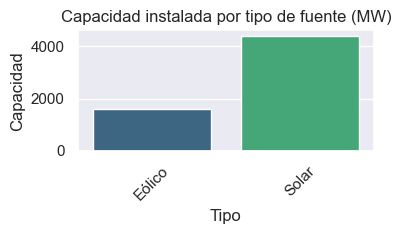


Capacidad por tipo de fuente:
 Tipo
Solar     4384.35
Eólico    1615.17
Name: Capacidad, dtype: float64


In [101]:
capacidad_por_fuente = df.groupby('Tipo')['Capacidad'].sum().reset_index()

plt.figure(figsize=(4,2.5))
sns.barplot(data=capacidad_por_fuente, x='Tipo', y='Capacidad', palette="viridis")
plt.title("Capacidad instalada por tipo de fuente (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Capacidad por tipo de fuente
capacidad_por_fuente = df.groupby('Tipo')['Capacidad'].sum().sort_values(ascending=False)
print("\nCapacidad por tipo de fuente:\n",capacidad_por_fuente)

#Agrupamos por tipo de fuente renovable y sumamos la capacidad.
#El gráfico de barras muestra qué tecnología (solar, eólica, etc.) tiene mayor participación en la matriz energética.

C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_15752\3808541659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_departamentos, x='Capacidad', y='Departamento', palette="mako")


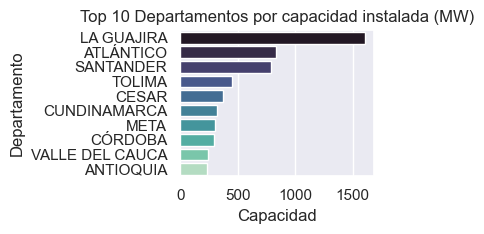

In [102]:
top_departamentos = df.groupby('Departamento')['Capacidad'].sum().reset_index()
top_departamentos = top_departamentos.sort_values(by='Capacidad', ascending=False).head(10)

plt.figure(figsize=(4,2.5))
sns.barplot(data=top_departamentos, x='Capacidad', y='Departamento', palette="mako")
plt.title("Top 10 Departamentos por capacidad instalada (MW)")
plt.tight_layout()
plt.show()

#Mostramos los 10 departamentos con más capacidad instalada,
#Esto permite ver dónde se están concentrando los proyectos más grandes.

C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_15752\4834844.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impacto_social, x='Tipo', y='Usuarios', palette="crest")


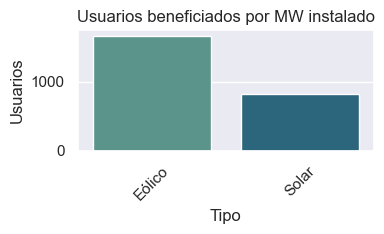

In [103]:
impacto_social = df.groupby('Tipo').agg({
    'Usuarios': 'sum',
    'Capacidad': 'sum'
}).reset_index()

impacto_social['Usuarios'] = impacto_social['Usuarios'] / impacto_social['Capacidad']

plt.figure(figsize=(4,2.5))
sns.barplot(data=impacto_social, x='Tipo', y='Usuarios', palette="crest")
plt.title("Usuarios beneficiados por MW instalado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Calculamos cuántos usuarios se benefician por cada MW instalado según la tecnología,
#Esto mide el impacto social relativo de cada fuente.

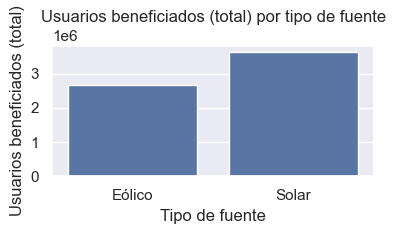

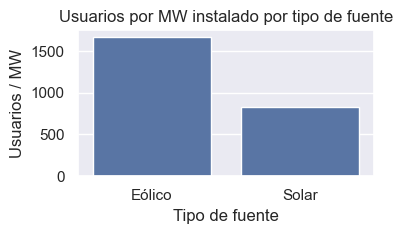

,Tipo,Usuarios_beneficiados,Capacidad_MW,Usuarios_por_MW
0,Eólico,2688839,1615.17,1664.740554
1,Solar,3648393,4384.35,832.139998


In [104]:

# 2) Normalizaciones mínimas para evitar errores de nombres largos con tildes
df = df.rename(columns={
    'Fecha estimada FPO': 'Fecha_FPO',
    'Emisiones CO2 [Ton/año]': 'CO2_ton_anio',
    'Inversión estimada [COP]': 'Inversion_COP'
})
df['Año_FPO'] = pd.to_datetime(df['Fecha_FPO'], errors='coerce').dt.year
df['Capacidad_MW'] = df['Capacidad']  
# 3) Agregación social
social = (df.groupby('Tipo', as_index=False)
            .agg(Usuarios_beneficiados=('Usuarios', 'sum'),
                 Capacidad_MW=('Capacidad_MW', 'sum')))

social['Usuarios_por_MW'] = social['Usuarios_beneficiados'] / social['Capacidad_MW']

# 4A) Gráfico 1: Usuarios beneficiados (total) por tipo
sns.set_theme()
plt.figure(figsize=(4,2.5))
sns.barplot(data=social, x='Tipo', y='Usuarios_beneficiados')
plt.title('Usuarios beneficiados (total) por tipo de fuente')
plt.xlabel('Tipo de fuente')
plt.ylabel('Usuarios beneficiados (total)')
plt.tight_layout()
plt.show()

# 4B) Gráfico 2: Usuarios por MW por tipo
plt.figure(figsize=(4,2.5))
sns.barplot(data=social, x='Tipo', y='Usuarios_por_MW')
plt.title('Usuarios por MW instalado por tipo de fuente')
plt.xlabel('Tipo de fuente')
plt.ylabel('Usuarios / MW')
plt.tight_layout()
plt.show()

# Ver la tabla resultado
social

#Usuarios_beneficiados es la suma de personas alcanzadas por los proyectos de cada tecnología.
#Usuarios_por_MW es un indicador de eficiencia social: cuántas personas se benefician por cada MW instalado en esa tecnología.
#Se generan dos gráficos separados porque las unidades son distintas (personas totales vs. personas por MW).

C:\Users\MARIA JOSE\AppData\Local\Temp\ipykernel_15752\2995956843.py:20: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\MARIA JOSE\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


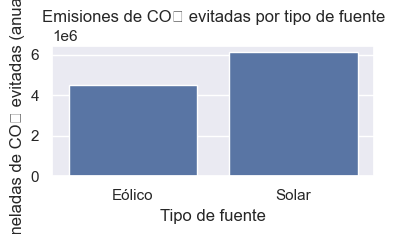

,Tipo,CO2_ton_anio
0,Eólico,4527644
1,Solar,6143433


In [105]:
# 2) Normalizar nombres de columnas y crear alias útiles
df = df.rename(columns={
    'Fecha estimada FPO': 'Fecha_FPO',
    'Emisiones CO2 [Ton/año]': 'CO2_ton_anio',
    'Inversión estimada [COP]': 'Inversion_COP'
})
df['Año_FPO'] = pd.to_datetime(df['Fecha_FPO'], errors='coerce').dt.year
df['Capacidad_MW'] = df['Capacidad']

# 3) Agregar emisiones evitadas por tipo
co2_por_tipo = df.groupby('Tipo', as_index=False)['CO2_ton_anio'].sum()

# 4) Gráfico
sns.set_theme()
plt.figure(figsize=(4,2.5))
sns.barplot(data=co2_por_tipo, x='Tipo', y='CO2_ton_anio')
plt.title('Emisiones de CO₂ evitadas por tipo de fuente')
plt.xlabel('Tipo de fuente')
plt.ylabel('Toneladas de CO₂ evitadas (anuales)')
plt.tight_layout()
plt.show()

#  Ver tabla
co2_por_tipo

#CO2_ton_anio indica cuántas toneladas de CO₂ no se emiten gracias a la operación de estos proyectos.
#Agrupamos por Tipo para ver qué tecnología aporta más reducción de emisiones.
#El gráfico muestra impacto ambiental directo:
#Valores altos = mayor contribución a mitigar el cambio climático.
#Se puede comparar la eficiencia ambiental entre tecnologías.

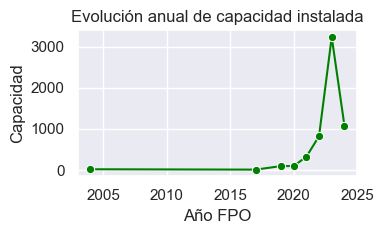

In [106]:
capacidad_por_anio = df.groupby('Año FPO')['Capacidad'].sum().reset_index()

plt.figure(figsize=(4,2.5))
sns.lineplot(data=capacidad_por_anio, x='Año FPO', y='Capacidad', marker='o', color='green')
plt.title("Evolución anual de capacidad instalada")
plt.tight_layout()
plt.show()

#Se observa la tendencia de crecimiento o variación anual de la capacidad instalada,
#Útil para ver picos de inversión o años de menor actividad.

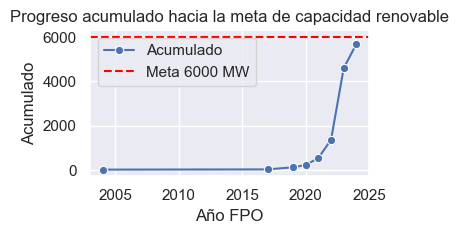

In [107]:
meta_mw = 6000  # Meta de capacidad
capacidad_por_anio['Acumulado'] = capacidad_por_anio['Capacidad'].cumsum()
capacidad_por_anio['% Cumplimiento'] = (capacidad_por_anio['Acumulado'] / meta_mw) * 100

plt.figure(figsize=(4,2.5))
sns.lineplot(data=capacidad_por_anio, x='Año FPO', y='Acumulado', marker='o', label='Acumulado')
plt.axhline(meta_mw, color='red', linestyle='--', label=f'Meta {meta_mw} MW')
plt.title("Progreso acumulado hacia la meta de capacidad renovable")
plt.legend()
plt.tight_layout()
plt.show()

#Calcula la capacidad acumulada año a año y la compara con la meta establecida (6000 MW),
#Muestra si se está cumpliendo el plan de expansión.


In [108]:
# Renombrar columnas para que sean fáciles de usar
df = df.rename(columns={
    'Inversión estimada [COP]': 'Inversion_COP',
    'Emisiones CO2 [Ton/año]': 'CO2_ton_anio',
    'Capacidad': 'Capacidad_MW'
})

# Estadísticas generales
total_proyectos = len(df)
total_capacidad = df['Capacidad_MW'].sum()
total_inversion = df['Inversion_COP'].sum()
total_usuarios = df['Usuarios'].sum()
total_empleos = df['Empleos estimados'].sum()
total_co2 = df['CO2_ton_anio'].sum()

print("\n📊 Resumen General:")
print(f"Proyectos totales: {total_proyectos}")
#print(f"Capacidad total: {total_capacidad:.2f} MW")
print(f"Inversión total: ${total_inversion:,.0f} COP")
print(f"Usuarios beneficiados: {total_usuarios:,}")
print(f"Empleos estimados: {total_empleos:,}")
print(f"CO₂ evitado: {total_co2:,} ton/año")



📊 Resumen General:
Proyectos totales: 158
Inversión total: $22,919,198,800,000 COP
Usuarios beneficiados: 6,337,232
Empleos estimados: 35,014
CO₂ evitado: 10,671,077 ton/año


In [109]:
#Mostrar el porcentaje de la capacidad 
#print(capacidad_tipo['Capacidad'].value_counts()/capacidad_tipo['Capacidad'].count()*100)

# Calcular el porcentaje
# Calcular el conteo por tipo de energía
conteo_tipos = df['Tipo'].value_counts()
porcentajes=(conteo_tipos / conteo_tipos.sum()) * 100
# Unir en un DataFrame
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje (%)': porcentajes.round(2)
})
print(resultado)

        Cantidad  Porcentaje (%)
Tipo                            
Solar        145           91.77
Eólico        13            8.23


In [110]:
conteo_tipos = df['Capacidad'].value_counts()
porcentajes=(conteo_tipos / conteo_tipos.sum()) * 100
# Unir en un DataFrame
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje (%)': porcentajes.round(2)
})
print(resultado)

KeyError: 'Capacidad'

In [ ]:
conteo_tipos = df['Departamento'].value_counts()
porcentajes=(conteo_tipos / conteo_tipos.sum()) * 100
# Unir en un DataFrame
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje (%)': porcentajes.round(2)
})
print(resultado)

                                                    Cantidad  Porcentaje (%)
Departamento                                                                
VALLE DEL CAUCA                                           17           10.76
ATLÁNTICO                                                 15            9.49
TOLIMA                                                    14            8.86
LA GUAJIRA                                                12            7.59
META                                                      12            7.59
CÓRDOBA                                                   10            6.33
ANTIOQUIA                                                  8            5.06
BOLÍVAR                                                    8            5.06
RISARALDA                                                  8            5.06
CUNDINAMARCA                                               7            4.43
NORTE DE SANTANDER                                         6            3.80

In [111]:
total_proyectos = len(df)
total_capacidad = df['Capacidad_MW'].sum()
total_inversion = df['Inversion_COP'].sum()
total_usuarios = df['Usuarios'].sum()
total_empleos = df['Empleos estimados'].sum()
total_co2 = df['CO2_ton_anio'].sum()

print("\n📊 Resumen General:")
print(f"Proyectos totales: {total_proyectos}")
print(f"Capacidad total: {total_capacidad:.2f} MW")
print(f"Inversión total: ${total_inversion:,.0f} COP")
print(f"Usuarios beneficiados: {total_usuarios:,}")
print(f"Empleos estimados: {total_empleos:,}")
print(f"CO₂ evitado: {total_co2:,} ton/año")



📊 Resumen General:
Proyectos totales: 158


TypeError: unsupported format string passed to Series.__format__